# Predict Sentiments of Tweets

### Problem Description

Given dataset contains data of tweets on various airline’s twitter handles.

It contains a total of 12 columns, out of which one column specifies the sentiment of the tweet. All other columns provide various information related to what was the tweet, where was it posted from, when was it posted, it's retweeted; etc.

Your task is to build a machine learning / deep learning model to predict the sentiment of the tweet using all or some of the other given columns.

### Data Description

Description of columns of the dataset is given below - 

Sr No | Column name | Description
--- | --- | ---
1. | tweet_id | Id of the tweet
2. | airline_sentiment |Sentiment of the tweet (Target variable)
3. | airline_sentiment_confidence | Confidence with which the given sentiment was determined
4. | negativereason_confidence | Confidence with which the negative reason of tweet was predicted
5. | name | Name of the person who tweeted
6. | retweet_count | Number of retweets
7. | text | Text of the tweet whose sentiment has to be predicted
8. | tweet_created | Time at which the tweet was created
9. | tweet_location | Location from where the tweet was posted
10. | user_timezone | Time zone from where the tweet was posted
11. | negativereason | Reason for which user posted a negative tweet
12. | airline |Airline for which the tweet was posted

## 1. Data Exploration

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# Read training dataset
df = pd.read_csv('train.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,Tr_tweet_1,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0.0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,Tr_tweet_2,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0.0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,Tr_tweet_3,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0.0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,Tr_tweet_4,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0.0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,Tr_tweet_5,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0.0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
df.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
3334,Tr_tweet_3335,negative,1.0000,Cancelled Flight,1.0000,United,GeorgeMcflyOG,0.0,@united idea: if u don't want us to be frustra...,2015-02-18 14:42:04 -0800,NJ,Eastern Time (US & Canada)
3335,Tr_tweet_3336,negative,1.0000,Late Flight,1.0000,United,GeorgeMcflyOG,0.0,@united I will be patient in my luxurious midd...,2015-02-18 14:40:23 -0800,NJ,Eastern Time (US & Canada)
3336,Tr_tweet_3337,negative,0.6678,Flight Booking Problems,0.3381,United,GeorgeMcflyOG,0.0,@united I will be patient as your agent explai...,2015-02-18 14:39:04 -0800,NJ,Eastern Time (US & Canada)
3337,Tr_tweet_3338,negative,0.6667,Lost Luggage,0.6667,United,Dayrean,0.0,@united please help trace my luggage which was...,2015-02-18 14:37:52 -0800,NaN,NaN
3338,Tr_tweet_3339,negative,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3339 entries, 0 to 3338
Data columns (total 12 columns):
tweet_id                        3339 non-null object
airline_sentiment               3339 non-null object
airline_sentiment_confidence    3339 non-null float64
negativereason                  2134 non-null object
negativereason_confidence       2450 non-null float64
airline                         3338 non-null object
name                            3338 non-null object
retweet_count                   3338 non-null float64
text                            3338 non-null object
tweet_created                   3243 non-null object
tweet_location                  2319 non-null object
user_timezone                   2231 non-null object
dtypes: float64(3), object(9)
memory usage: 313.1+ KB


In [5]:
# Remove missing values in “text” column
df = df[pd.notnull(df['text'])]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3338 entries, 0 to 3337
Data columns (total 12 columns):
tweet_id                        3338 non-null object
airline_sentiment               3338 non-null object
airline_sentiment_confidence    3338 non-null float64
negativereason                  2134 non-null object
negativereason_confidence       2450 non-null float64
airline                         3338 non-null object
name                            3338 non-null object
retweet_count                   3338 non-null float64
text                            3338 non-null object
tweet_created                   3243 non-null object
tweet_location                  2319 non-null object
user_timezone                   2231 non-null object
dtypes: float64(3), object(9)
memory usage: 339.0+ KB


In [7]:
# Remove unuseful columns
col = ['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 
       'negativereason', 'negativereason_confidence', 'airline', 'text']
df = df[col]
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,text
0,Tr_tweet_1,neutral,1.0000,NaN,NaN,Virgin America,@VirginAmerica What @dhepburn said.
1,Tr_tweet_2,positive,0.3486,NaN,0.0000,Virgin America,@VirginAmerica plus you've added commercials t...
2,Tr_tweet_3,neutral,0.6837,NaN,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,Tr_tweet_4,negative,1.0000,Bad Flight,0.7033,Virgin America,@VirginAmerica it's really aggressive to blast...
4,Tr_tweet_5,negative,1.0000,Can't Tell,1.0000,Virgin America,@VirginAmerica and it's a really big bad thing...


In [8]:
# Encoding sentiment
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['airline_sentiment'])
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,text,sentiment
0,Tr_tweet_1,neutral,1.0000,NaN,NaN,Virgin America,@VirginAmerica What @dhepburn said.,1
1,Tr_tweet_2,positive,0.3486,NaN,0.0000,Virgin America,@VirginAmerica plus you've added commercials t...,2
2,Tr_tweet_3,neutral,0.6837,NaN,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...,1
3,Tr_tweet_4,negative,1.0000,Bad Flight,0.7033,Virgin America,@VirginAmerica it's really aggressive to blast...,0
4,Tr_tweet_5,negative,1.0000,Can't Tell,1.0000,Virgin America,@VirginAmerica and it's a really big bad thing...,0


Text(0.5,0,'Sentiment')

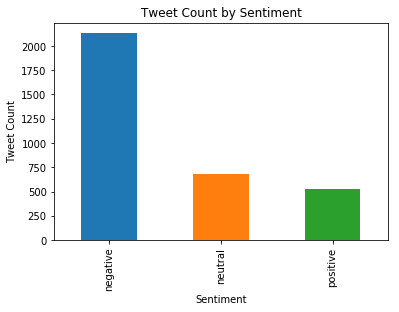

In [9]:
df.groupby('airline_sentiment').text.count().plot.bar(ylim=0)
plt.title('Tweet Count by Sentiment')
plt.ylabel('Tweet Count')
plt.xlabel('Sentiment')

We see that the number of tweets with different sentiment is not balanced. We will leave it as it is.

In [10]:
# How many airlines?
df['airline'].unique()

array(['Virgin America', 'United'], dtype=object)

## 2. Pre-processing

The classifiers and learning algorithms can not directly process the text documents in their original form, as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length. Therefore, during the preprocessing step, the texts are converted to a more manageable representation.

### A) Removing Twitter Handles (@airline)

In [11]:
# Load the necessary libraries
import re
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

Below is a user-defined function to remove unwanted text patterns from the tweets. It takes two arguments, one is the original string of text and the other is the pattern of text that we want to remove from the string. The function returns the same input string but without the given pattern. We will use this function to remove the pattern ‘@user’ from all the tweets in our data.

In [12]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  

Let’s create a new column tidy_text, it will contain the cleaned and processed tweets. Note that we have passed “@[\w]*” as the pattern to the remove_pattern function. It is actually a regular expression which will pick any word starting with ‘@’.

In [13]:
# Remove '@airline' from text
df['tidy_text'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*")

In [14]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,text,sentiment,tidy_text
0,Tr_tweet_1,neutral,1.0000,NaN,NaN,Virgin America,@VirginAmerica What @dhepburn said.,1,What said.
1,Tr_tweet_2,positive,0.3486,NaN,0.0000,Virgin America,@VirginAmerica plus you've added commercials t...,2,plus you've added commercials to the experien...
2,Tr_tweet_3,neutral,0.6837,NaN,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...,1,I didn't today... Must mean I need to take an...
3,Tr_tweet_4,negative,1.0000,Bad Flight,0.7033,Virgin America,@VirginAmerica it's really aggressive to blast...,0,"it's really aggressive to blast obnoxious ""en..."
4,Tr_tweet_5,negative,1.0000,Can't Tell,1.0000,Virgin America,@VirginAmerica and it's a really big bad thing...,0,and it's a really big bad thing about it


### B) Expanding Contractions

Contractions are shortened version of words or syllables. They exist in either written or spoken forms. Shortened versions of existing words are created by removing specific letters and sounds. In case of English contractions, they are often created by removing one of the vowels from the word.

By nature, contractions do pose a problem for NLP and text analytics because, to start with, we have a special apostrophe character in the word. Ideally, we can have a proper mapping for contractions and their corresponding expansions and then use it to expand all the contractions in our text.

In [15]:
import contractions

In [16]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [17]:
# from contractions import CONTRACTION_MAP

# Define function to expand contractions
def expand_contractions(text):
    contractions_pattern = re.compile('({})'.format('|'.join(CONTRACTION_MAP.keys())),flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = CONTRACTION_MAP.get(match)\
                        if CONTRACTION_MAP.get(match)\
                        else CONTRACTION_MAP.get(match.lower())
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
    
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [20]:
# Expand contractions
expanded_text = []
for text in df['tidy_text']:
    text = text.lower()
    text = expand_contractions(text)
    expanded_text.append(text)
    
df['tidy_text'] = expanded_text

In [21]:
df[['text','tidy_text']].head()

,text,tidy_text
0,@VirginAmerica What @dhepburn said.,what said.
1,@VirginAmerica plus you've added commercials t...,plus you have added commercials to the experi...
2,@VirginAmerica I didn't today... Must mean I n...,i did not today... must mean i need to take a...
3,@VirginAmerica it's really aggressive to blast...,"it is really aggressive to blast obnoxious ""e..."
4,@VirginAmerica and it's a really big bad thing...,and it is a really big bad thing about it


### C) Removing Punctuations, Numbers, and Special Characters

Punctuations, numbers and special characters do not help much. It is better to remove them from the text just as we removed the twitter handles. Here we will replace everything except characters and hashtags with spaces.

In [22]:
# remove special characters, numbers, punctuations
df['tidy_text'] = df['tidy_text'].str.replace("[^a-zA-Z#]", " ")

In [23]:
df[['text','tidy_text']].head()

,text,tidy_text
0,@VirginAmerica What @dhepburn said.,what said
1,@VirginAmerica plus you've added commercials t...,plus you have added commercials to the experi...
2,@VirginAmerica I didn't today... Must mean I n...,i did not today must mean i need to take a...
3,@VirginAmerica it's really aggressive to blast...,it is really aggressive to blast obnoxious e...
4,@VirginAmerica and it's a really big bad thing...,and it is a really big bad thing about it


## 3. Text Representation

For each term in our dataset, we will calculate a measure called Term Frequency, Inverse Document Frequency, abbreviated to tf-idf. 

We will use sklearn.feature_extraction.text.TfidfVectorizer to calculate a tf-idf vector for each of consumer complaint narratives:
* sublinear_df is set to True to use a logarithmic form for frequency.
* min_df is the minimum numbers of documents a word must be present in to be kept.
* norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1.
* ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams.
* stop_words is set to "english" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features.

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.tidy_text).toarray()
labels = df.sentiment
features.shape

(3338, 1108)

Now, each of 3338 tweet texts is represented by 1108 features, representing the tf-idf score for different unigrams and bigrams.